In [98]:
'''
Importando as bibliotecas necessárias
Mudar o comando de pip install folium caso necessário
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [99]:
'''
Lendo os dados do csv completo e da amostra reduzida
Utilizar AMOSTRA_TOTAL.csv em maior
Utilizar AMOSTRA_MENOR.csv em menor
'''
menor = pd.read_csv("../database/AMOTRA_MENOR.csv", sep=';')
maior = pd.read_csv("../database/AMOTRA_TOTAL.csv", sep=';')

# display horizontal
pd.set_option('display.max_columns', None)

In [100]:
'''Ordenação para verificar pontos médios no mapa'''
menor_ordenado = menor.sort_values(by=['LONGITUDE', 'LATITUDE']).reset_index(drop=True)

In [101]:
'''Separação de algumas rotas de acordo com seu "CODIGO_ROTA"'''
rota = menor[menor["CODIGO_ROTA"] == "72_213"]
rota2 = menor[menor["CODIGO_ROTA"] == "72_210"]
rota3 = menor[menor["CODIGO_ROTA"] == "72_204"]

In [102]:
'''Validação se a coluna "SEQUENCIA" segue um padrão de espaçamento de 1 em 1'''
rota.sort_values(by="SEQUENCIA",ascending = True)

INDICE   LATITUDE  LONGITUDE CODIGO_ROTA  SEQUENCIA  \
142   401596191.0 -22.814091 -43.320344      72_213        1.0   
3081  400329928.0 -22.814335 -43.320367      72_213        2.0   
4809  400149556.0 -22.813897 -43.320292      72_213        3.0   
5071  400291892.0 -22.813741 -43.320400      72_213        4.0   
2401  402880046.0 -22.813741 -43.320400      72_213        5.0   
...           ...        ...        ...         ...        ...   
5284  400104212.0 -22.813817 -43.319748      72_213      493.0   
716   400472069.0 -22.813964 -43.320097      72_213      494.0   
2820  400456975.0 -22.813929 -43.320014      72_213      495.0   
4080  400384606.0 -22.813893 -43.319928      72_213      496.0   
3064  400510900.0 -22.813855 -43.319839      72_213      497.0   

                LOGRADOURO  NUMERO  
142      CRISTIANO MACHADO   591.0  
3081  GAL MAGALHAES BARATA   336.0  
4809     CRISTIANO MACHADO   494.0  
5071     CRISTIANO MACHADO   504.0  
2401     CRISTIANO MACHADO   504.0  
...                    ...     ...  
5284  GAL MAGALHAES BARATA   419.0  
716   GAL MAGALHAES BARATA   377.0  
2820  GAL MAGALHAES BARATA   385.0  
4080  GAL MAGALHAES BARATA   397.0  
3064  GAL MAGALHAES BARATA   407.0  

[494 rows x 7 columns]

In [107]:
def haversine(lat1, lon1, lat2, lon2):
    # Raio da Terra em km
    R = 6371.0
    
    # Converter graus para radianos
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Diferença das latitudes e longitudes em radianos
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Fórmula de Haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    
    return distance

# Certifique-se de que menor_ordenado não está vazio
if not menor_ordenado.empty:
    # Assegure que os índices estão corretos após qualquer processamento
    menor_ordenado.reset_index(drop=True, inplace=True)

    # Agora você pode pegar o ponto base com segurança
    ponto_base = menor_ordenado.iloc[0]

    # Aplicar a função haversine
    menor_ordenado['distancia'] = menor_ordenado.apply(
        lambda row: haversine(
            ponto_base['LATITUDE'],
            ponto_base['LONGITUDE'], 
            row['LATITUDE'], 
            row['LONGITUDE']
        ),
        axis=1
    )
    # Exiba o resultado
    display(menor_ordenado.head(20))
else:
    print("O DataFrame 'menor_ordenado' está vazio. Não é possível calcular as distâncias.")

INDICE   LATITUDE  LONGITUDE CODIGO_ROTA  SEQUENCIA  \
0   400508491.0 -22.809562 -43.331164      72_203       34.0   
1   402979482.0 -22.809711 -43.331150      87_415        1.0   
2   402843796.0 -22.809483 -43.331149      87_415        2.0   
3   403469407.0 -22.809276 -43.331144      72_203       31.0   
4   402840251.0 -22.809437 -43.331131      87_415        2.0   
5   402846599.0 -22.809777 -43.331127        84_3     1330.0   
6   400086604.0 -22.809509 -43.331047      72_203       26.0   
7   403470567.0 -22.809458 -43.331022      72_203       30.0   
8   403470554.0 -22.809458 -43.331022      72_203       28.0   
9   403470570.0 -22.809458 -43.331022      72_203       29.0   
10  400108581.0 -22.809417 -43.331012      72_203       27.0   
11  402830016.0 -22.809102 -43.331005      72_204      308.0   
12  402846745.0 -22.809981 -43.331004        84_4       27.0   
13  402829998.0 -22.809049 -43.330985      72_204      307.0   
14  402770636.0 -22.809316 -43.330975      72_204      266.0   
15  403515141.0 -22.809051 -43.330971      72_204      308.0   
16  402829675.0 -22.809002 -43.330967      72_204      263.0   
17  403468927.0 -22.809295 -43.330962      80_108      175.0   
18  402852732.0 -22.810059 -43.330955      87_415      106.0   
19  402826877.0 -22.808956 -43.330950      72_204      262.0   

             LOGRADOURO  NUMERO  distancia  
0   RODOLFO CHAMBELLAND   141.0   0.000000  
1   RODOLFO CHAMBELLAND    19.0   0.016630  
2   RODOLFO CHAMBELLAND   143.0   0.008918  
3   RODOLFO CHAMBELLAND   145.0   0.031868  
4   RODOLFO CHAMBELLAND   161.0   0.014305  
5   RODOLFO CHAMBELLAND   113.0   0.024206  
6   RODOLFO CHAMBELLAND   204.0   0.013362  
7   RODOLFO CHAMBELLAND   147.0   0.018590  
8   RODOLFO CHAMBELLAND   147.0   0.018590  
9   RODOLFO CHAMBELLAND   147.0   0.018590  
10  RODOLFO CHAMBELLAND   214.0   0.022421  
11  RODOLFO CHAMBELLAND   169.0   0.053683  
12  RODOLFO CHAMBELLAND   110.0   0.049393  
13  RODOLFO CHAMBELLAND   173.0   0.059921  
14  RODOLFO CHAMBELLAND   224.0   0.033519  
15  RODOLFO CHAMBELLAND   169.0   0.060166  
16  RODOLFO CHAMBELLAND   175.0   0.065461  
17  RODOLFO CHAMBELLAND   189.0   0.036196  
18  RODOLFO CHAMBELLAND   108.0   0.059271  
19  RODOLFO CHAMBELLAND   717.0   0.070864

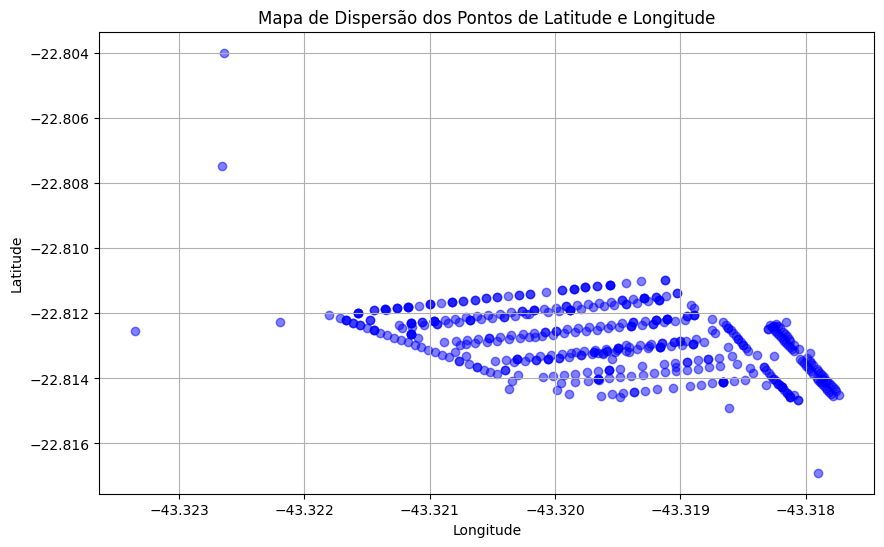

In [103]:
'''Plotagem da dispersão de pontos na rota 1'''
plt.figure(figsize=(10, 6))
plt.scatter(rota['LONGITUDE'], rota['LATITUDE'], c='blue', marker='o', alpha=0.5)
plt.title('Mapa de Dispersão dos Pontos de Latitude e Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

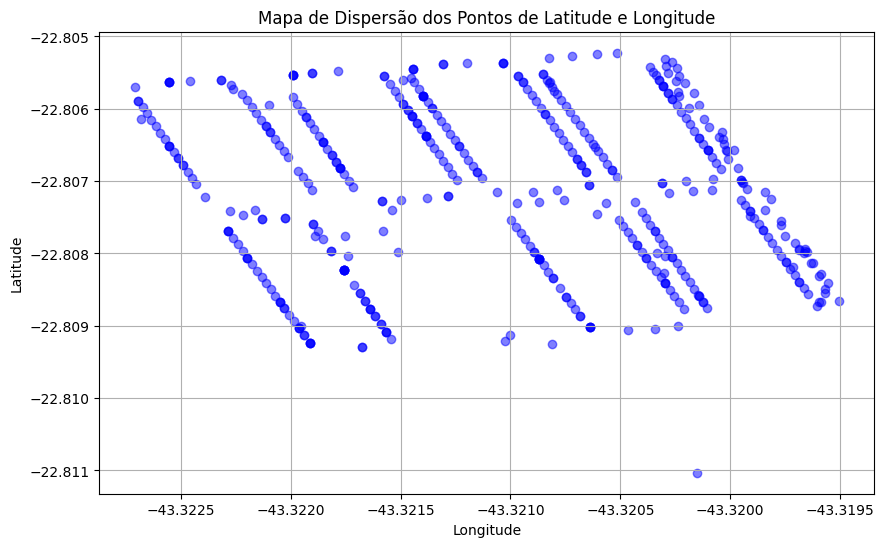

In [104]:
'''Plotagem da dispersão de pontos na rota 2'''
plt.figure(figsize=(10, 6))
plt.scatter(rota2['LONGITUDE'], rota2['LATITUDE'], c='blue', marker='o', alpha=0.5)
plt.title('Mapa de Dispersão dos Pontos de Latitude e Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

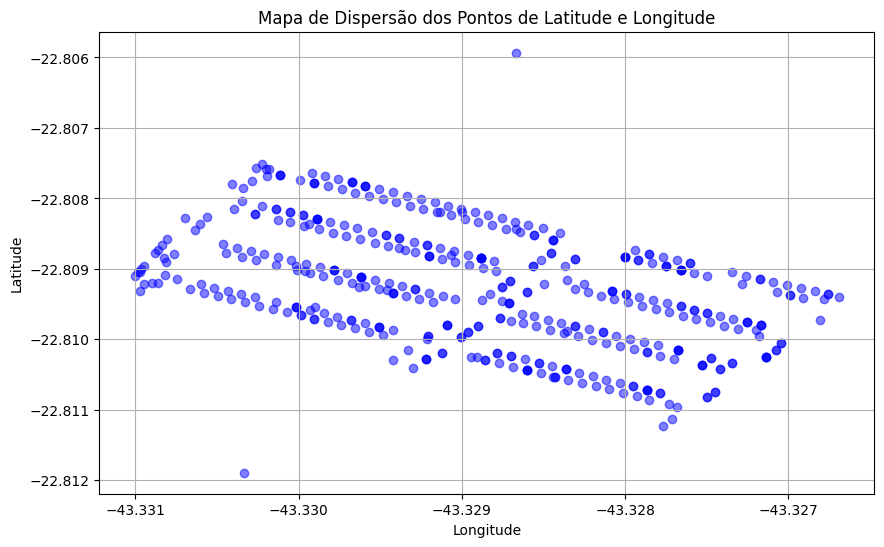

In [105]:
'''Plotagem da dispersão de pontos na rota 3'''
plt.figure(figsize=(10, 6))
plt.scatter(rota3['LONGITUDE'], rota3['LATITUDE'], c='blue', marker='o', alpha=0.5)
plt.title('Mapa de Dispersão dos Pontos de Latitude e Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [108]:
'''Plotagem de um mapa com todos os pontos, coloridos de acordo com sua presença em uma rota específica'''
mapa = folium.Map(location=[menor['LATITUDE'].mean(), menor['LONGITUDE'].mean()], zoom_start=10)

# Criar um dicionário para mapear cada código de rota para uma cor única
codigos_cores = {}
cores_disponiveis = ['#CC0000', '#CC3600', '#CC6F40', '#CC8800', '#CCAA00', '#CCCC00', '#8CA619', '#66CC00', '#268A26', '#00CC00', '#00B299', '#00A8B3', '#1476B9', '#2A51B9', '#000099', '#7226A6', '#7F2899', '#7200A6', '#6A006A', '#CC1174', '#CC54A5', '#CC918A', '#CCB2B0', '#D9CBBF', '#D9DFCA', '#D9CBB2', '#D9BBA1', '#BFB791', '#C8D37B', '#9E9661', '#CC8560', '#CC4F38']

# Atribuir uma cor única para cada código de rota
for codigo_rota, cor in zip(menor['CODIGO_ROTA'].unique(), cores_disponiveis):
    codigos_cores[codigo_rota] = cor

# Adicionar CircleMarkers para cada ponto no DataFrame com cores baseadas no código de rota
for index, row in menor.iterrows():
    cor = codigos_cores.get(row['CODIGO_ROTA'], 'gray')
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']], radius=1, color=cor, fill=True, fill_color=cor, fill_opacity=0.6).add_to(mapa)

# Exibir o mapa
mapa.save('mapa_com_cores_por_rota.html')
mapa

/tmp/ipykernel_293872/51023793.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


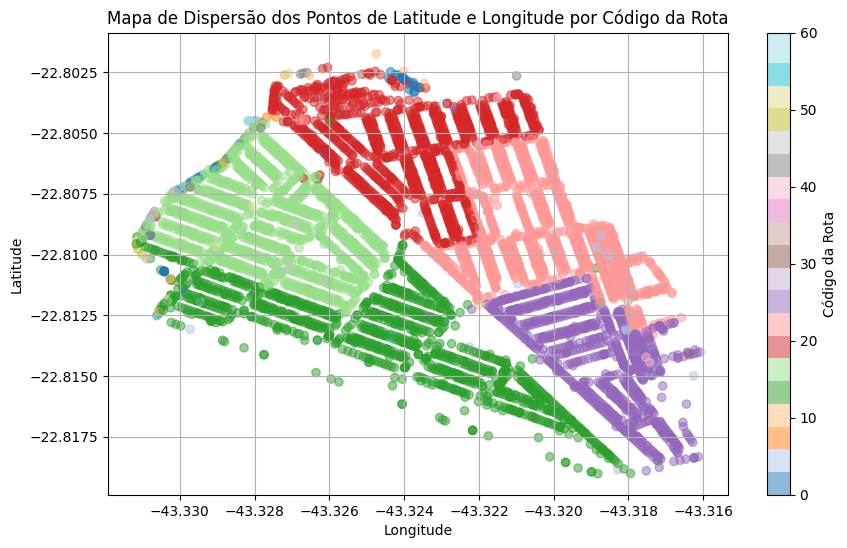

In [106]:
'''Outra plotagem, com maior noção de escala'''
# Converter 'CODIGO_ROTA' para valores categóricos numéricos
menor['CODIGO_ROTA_CAT'] = pd.Categorical(menor['CODIGO_ROTA']).codes

# Definir uma paleta de cores personalizada
num_colors = len(menor['CODIGO_ROTA_CAT'].unique())
colors = plt.cm.get_cmap('tab20', num_colors)

# Plotar latitude e longitude com a paleta personalizada
plt.figure(figsize=(10, 6))
scatter = plt.scatter(menor['LONGITUDE'], menor['LATITUDE'], c=menor['CODIGO_ROTA_CAT'], cmap=colors, alpha=0.5)

# Adicionar barra de cores
plt.colorbar(scatter, label='Código da Rota')

# Configurações do gráfico
plt.title('Mapa de Dispersão dos Pontos de Latitude e Longitude por Código da Rota')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()